In [31]:
import pandas as pd
from funpymodeling import status

In [32]:
import ast

In [33]:
data = pd.read_csv("../datasets/adapted_data/adaptedRatingsData.csv", sep = ",")
data

,userId,rating,title,imdbId
0,1,4.0,Toy Story,114709
1,5,4.0,Toy Story,114709
2,7,4.5,Toy Story,114709
3,15,2.5,Toy Story,114709
4,17,4.5,Toy Story,114709
...,...,...,...,...
100831,610,2.5,Bloodmoon,118745
100832,610,4.5,Sympathy for the Underdog,66806
100833,610,3.0,Hazard,798722
100834,610,3.5,Blair Witch,1540011


In [34]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,userId,0,0.0,0,0.0,610,int64
1,rating,0,0.0,0,0.0,10,float64
2,title,0,0.0,0,0.0,9433,object
3,imdbId,0,0.0,0,0.0,9724,int64


In [35]:
features_df = pd.read_csv("../datasets/adapted_data/adaptedFeaturesData.csv", sep = ",")
features_df['genres'] = features_df['genres'].apply(ast.literal_eval)
features_df

,title,genres,year,imdbId
0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,114709
1,Jumanji,"[Adventure, Children, Fantasy]",1995.0,113497
2,Grumpier Old Men,"[Comedy, Romance]",1995.0,113228
3,Waiting to Exhale,"[Comedy, Drama, Romance]",1995.0,114885
4,Father of the Bride Part II,[Comedy],1995.0,113041
...,...,...,...,...
9737,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",2017.0,5476944
9738,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",2017.0,5914996
9739,Flint,[Drama],2017.0,6397426
9740,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",2018.0,8391976


Because it does not matter if one number is higher than the other in `userId`, I am going to transform its values from **int64** into **objects** type. It is the same as saying that I am going to transform them from *numerical data* into *categorical data*

In [36]:
data["userId"] = data["userId"].astype("str")

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling import freq_tbl

## Univariate Analysis

### Number of movies

In [38]:
freq_tbl(data["title"]).shape[0]

9433

### Number of ratings

In [39]:
data.shape[0]


100836

### Number of users

In [40]:
freq_tbl(data["userId"]).shape[0]


610

### Average number of ratings per movie

In [41]:
sum(data["rating"]) / freq_tbl(data["title"]).shape[0]


37.43061592282413

### Distribution of movie ratings 

<Axes: xlabel='rating', ylabel='count'>

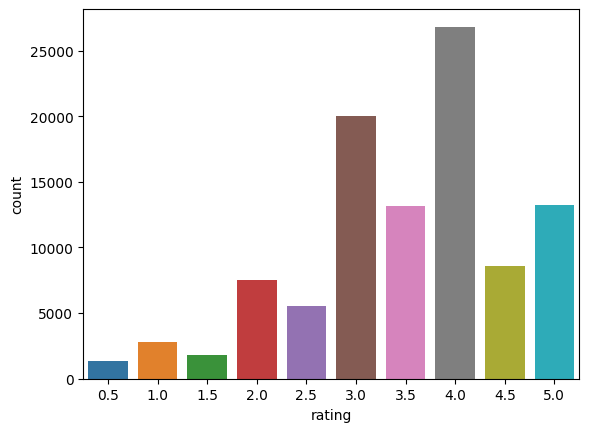

In [42]:
sns.countplot(x = "rating", data=data)

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

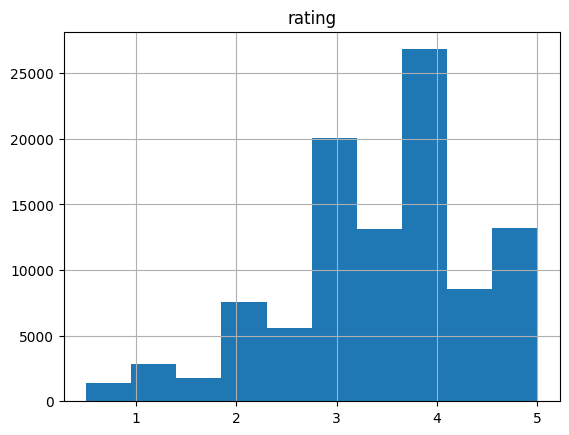

In [43]:
data.hist("rating")

- We could say that most movies are above average (rating >= 3.0)
- Movies with 4 out of 5 rating are the most common in the dataset

### Movies with the highest rating

In [44]:
data2 = data.drop(columns=["userId"])

data2.groupby("title").mean().sort_values(by="rating",ascending=False).query("rating==5.0")

,rating,imdbId
title,,
Mickey's Once Upon a Christmas,5.0,238414.0
Brother (Brat),5.0,118767.0
"Man and a Woman, A (Un homme et une femme)",5.0,61138.0
Advise and Consent,5.0,55728.0
Madame Sousatzka,5.0,95564.0
...,...,...
Winnie the Pooh Goes Visiting,5.0,211730.0
Heidi Fleiss: Hollywood Madam,5.0,113283.0
Zeitgeist: Moving Forward,5.0,1781069.0


We found 285 movies that have a 5.0 out of 5.0 rating, but we need to verify if they have one review or more.  
The movies that have a 5/5 rating with only one review, are not as reliable as one with more reviews.    
So lets find which movies with a 5/5 rating have more than one review.

In [45]:
movies5 = data2.groupby("title").mean().sort_values(by="rating",ascending=False).query("rating==5.0").index
movies_more_than_one_appearance = freq_tbl(data["title"]).query("frequency > 1")
matches = [x for x in movies_more_than_one_appearance["title"] if x in movies5]
matches

['Enter the Void',
 'Belle époque',
 'Come and See (Idi i smotri)',
 'Lesson Faust',
 'Lamerica',
 'Heidi Fleiss: Hollywood Madam',
 "Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000)"]

This 7 movies have more than one review, so the other 278 movies have a perfect score because they have one review.

Although this could be reliable information, it would be better if we use **Bayesian Average**

### High Rated Movies

Lets see movies with an average rating between 4.0 and 5.0, to see *high rated movies*

In [46]:
movies = data2.groupby("title").mean().sort_values(by="rating",ascending=False).query("rating >= 4.0 and rating < 5").index
movies_more_than_one_appearance = freq_tbl(data["title"]).query("frequency > 1")
matches = [x for x in movies_more_than_one_appearance["title"] if x in movies]
matches

['Forrest Gump',
 'The Shawshank Redemption',
 'Pulp Fiction',
 'The Silence of the Lambs',
 'The Matrix',
 'Star Wars: Episode IV - A New Hope',
 'Braveheart',
 "Schindler's List",
 'Fight Club',
 'Star Wars: Episode V - The Empire Strikes Back',
 'American Beauty',
 'The Usual Suspects',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark)',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Star Wars: Episode VI - Return of the Jedi',
 'The Godfather',
 'The Lord of the Rings: The Two Towers',
 'Saving Private Ryan',
 'The Lord of the Rings: The Return of the King',
 'Fargo',
 'Back to the Future',
 'Memento',
 'The Dark Knight',
 'Inception',
 'The Princess Bride',
 'Good Will Hunting',
 'Indiana Jones and the Last Crusade',
 'Monty Python and the Holy Grail',
 "One Flew Over the Cuckoo's Nest",
 'Léon: The Professional (a.k.a. The Professional) (Léon)',
 'Reservoir Dogs',
 'Eternal Sunshine of the Spotless Mind',
 'American History X',
 'The Godfather: Pa

As you can see, we can identify some widely acclaimed movies, such as **Forrest Gump, Pulp Fiction, Star Wars: Episode V - The Empire Strikes Back**, among others.

### Movies with the lowest rating

In [47]:
data2.groupby("title").mean().sort_values(by="rating",ascending=False).query("rating<=0.5")

,rating,imdbId
title,,
The Brothers Solomon,0.5,784972.0
Anaconda: The Offspring,0.5,1137996.0
Midnight Chronicles,0.5,1079372.0
Leprechaun 4: In Space,0.5,116861.0
Dead of Night,0.5,37635.0
...,...,...
Skyline,0.5,1564585.0
Glitter,0.5,118589.0
God's Not Dead,0.5,2528814.0


Once more, we verify if all the 90 movies have more than 1 appearance.

In [48]:
movies5 = data2.groupby("title").mean().sort_values(by="rating",ascending=False).query("rating <=0.5").index
movies_more_than_one_appearance = freq_tbl(data["title"]).query("frequency > 1")
matches = [x for x in movies_more_than_one_appearance["title"] if x in movies5]
matches

['Cyborg', 'Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie)']

If we search each one of this movies on Rotten Tomatoes or IMDb, we can see that this movies have a very low rating.

### The 5 movies with the most appearances

In [49]:
freq_tbl(data["title"]).head(5)

,title,frequency,percentage,cumulative_perc
0,Forrest Gump,329,0.003263,0.003263
1,The Shawshank Redemption,317,0.003144,0.006406
2,Pulp Fiction,307,0.003045,0.009451
3,The Silence of the Lambs,279,0.002767,0.012218
4,The Matrix,278,0.002757,0.014975


### Movies that only appear once

In [50]:
freq_tbl(data["title"]).query("frequency == 1")

,title,frequency,percentage,cumulative_perc
6144,Going in Style,1,0.00001,0.967393
6145,Crime Busters,1,0.00001,0.967403
6146,"Gospel According to St. Matthew, The (Vangelo ...",1,0.00001,0.967412
6147,Golden Door (Nuovomondo),1,0.00001,0.967422
6148,Last Exit to Brooklyn,1,0.00001,0.967432
...,...,...,...,...
9428,Ink,1,0.00001,0.999960
9429,The Haunted World of El Superbeasto,1,0.00001,0.999970
9430,"Misfortunates, The (De helaasheid der dingen)",1,0.00001,0.999980
9431,Earthlings,1,0.00001,0.999990


### Movies that appear more than once

In [51]:
freq_tbl(data["title"]).query("frequency > 1")

,title,frequency,percentage,cumulative_perc
0,Forrest Gump,329,0.003263,0.003263
1,The Shawshank Redemption,317,0.003144,0.006406
2,Pulp Fiction,307,0.003045,0.009451
3,The Silence of the Lambs,279,0.002767,0.012218
4,The Matrix,278,0.002757,0.014975
...,...,...,...,...
6139,Sherlock Jr.,2,0.000020,0.967303
6140,Foul Play,2,0.000020,0.967323
6141,The Hard Way,2,0.000020,0.967343
6142,Train of Life (Train de vie),2,0.000020,0.967363


In [52]:
freq_tbl(data["title"]).query("frequency > 1").shape[0]

6144

There are 6144 movies that appear more than once

### Users with the most appearances

In [53]:
freq_tbl(data["userId"]).head(5)

,userId,frequency,percentage,cumulative_perc
0,414,2698,0.026756,0.026756
1,599,2478,0.024575,0.051331
2,474,2108,0.020905,0.072236
3,448,1864,0.018485,0.090722
4,274,1346,0.013348,0.104070


### How many genres are in our dataset?

To add more, I am going to transform each genre row, from strings to a list of strings, where each string corresponds to a genre.

In [54]:
features_df

,title,genres,year,imdbId
0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,114709
1,Jumanji,"[Adventure, Children, Fantasy]",1995.0,113497
2,Grumpier Old Men,"[Comedy, Romance]",1995.0,113228
3,Waiting to Exhale,"[Comedy, Drama, Romance]",1995.0,114885
4,Father of the Bride Part II,[Comedy],1995.0,113041
...,...,...,...,...
9737,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",2017.0,5476944
9738,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",2017.0,5914996
9739,Flint,[Drama],2017.0,6397426
9740,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",2018.0,8391976


In [55]:
unique_genres = []
for x in features_df["genres"]:
    for y in list(x):
        if y not in unique_genres:
            unique_genres.append(y)
unique_genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [56]:
len(unique_genres)

20

There are 19 different genres and a string (no genres listed) for each movie that does not have genres listed.

### The 5 genres with the most appearances

In [57]:
genres = []
for x in features_df["genres"]:
    for y in x:
        genres.append(y)

In [58]:
freq_tbl(genres).head(5)

,0,frequency,percentage,cumulative_perc
0,Drama,4361,0.197473,0.197473
1,Comedy,3756,0.170078,0.367551
2,Thriller,1894,0.085763,0.453315
3,Action,1828,0.082775,0.536089
4,Romance,1596,0.07227,0.608359


### Countplot for genres distribution

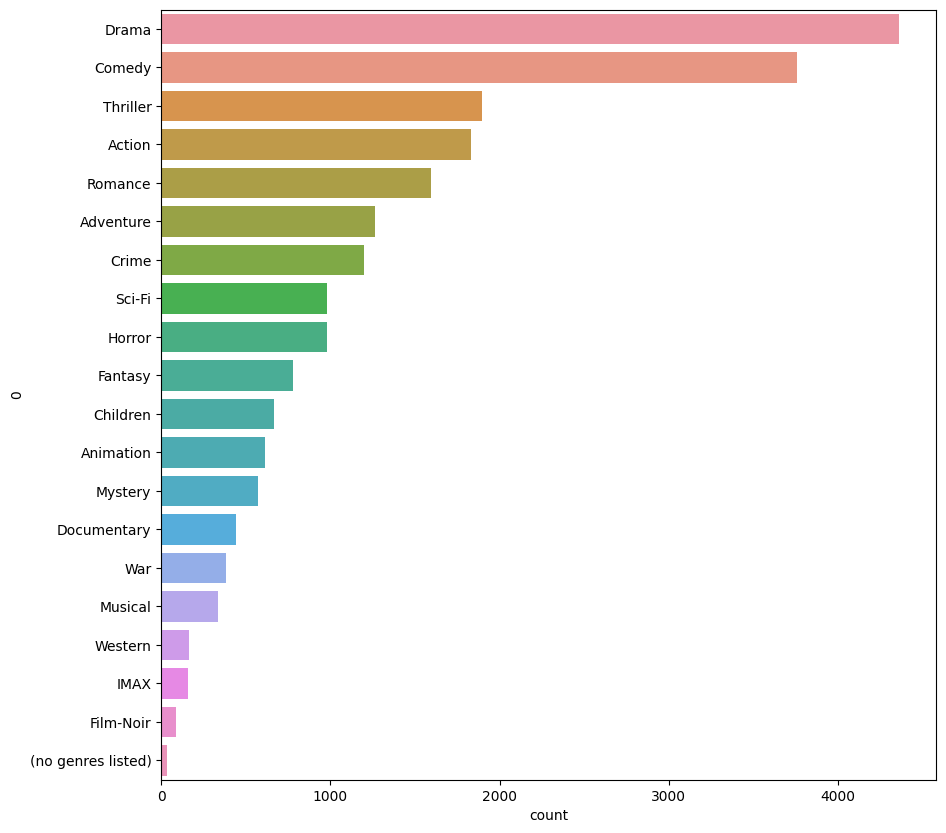

In [59]:
df = pd.DataFrame(genres)

plt.figure(figsize=(10,10))
sns.countplot(y=0, data=df, order = df[0].value_counts().index)
plt.show()

### Years with most movies 

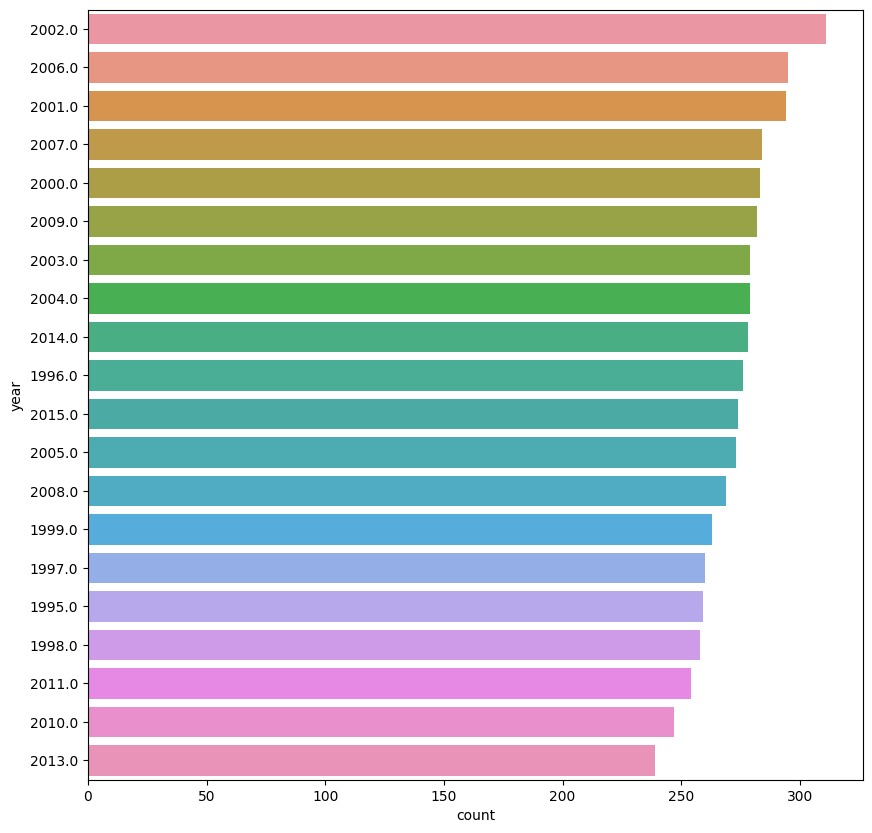

In [60]:
df = pd.DataFrame(features_df["year"])

plt.figure(figsize=(10,10))
sns.countplot(y="year", data=df,order=df["year"].value_counts().head(20).index)
plt.show()

We can see that the 2000s is the decade with most movies released, being followed by the 90s. 